The forecasting for the year 2021 will be done using the SARIMA model, as the data as can be deduced from the graphs in the Visualization notebook has seasonality, and has a trend, so it isn't stationary.
The pmdarima library will be used to search for the best fitting paramters to pass for the SARIMA model.
The data forecasting will be applied on each category separately, using the year 2020 values to test the model performance, then forecasting for the year 2021.

In [146]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs, nsdiffs

In [16]:
df = pd.read_csv('processed_dataframe.csv', index_col='DATE', parse_dates=True)
df.head()

,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


Now separating each category in a dataframe, and adding them into a dictionary

In [149]:
Alkohol_df = df[['Alkoholunfälle']]
Flucht_df = df[['Fluchtunfälle']]
Verkehrs_df = df[['Verkehrsunfälle']]
dataframes = {'Alkoholunfälle': Alkohol_df, 'Fluchtunfälle': Flucht_df, 'Verkehrsunfälle': Verkehrs_df}

The next step is to estimate the the number of required differences and seasonal differences, if any. the values will be passed as parameters for the 'auto_arima' class to estimate the orders for AR and MA for both the time series and seasonality (p, q, P and Q)

In [156]:
ndiff_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    ndiff_estimated[category].append(ndiffs(dataframe, max_d=4))
    ndiff_estimated[category].append(nsdiffs(dataframe, max_D=4, m=12))

In [168]:
for key, value in ndiff_estimated.items():
    print('Category: {}\nd value: {}\nD value: {}\n'.format(key, value[0], value[1]))

Category: Alkoholunfälle
d value: 1
D value: 0

Category: Fluchtunfälle
d value: 1
D value: 0

Category: Verkehrsunfälle
d value: 1
D value: 0



Now estimating the orders for the ARIMA and SARIMA

In [179]:
orders_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    print('Estimating orders for: {}\n'.format(category))
    model = pm.auto_arima(dataframe, seasonal=True, d=ndiff_estimated[category][0],
                          D=ndiff_estimated[category][1], m=12, max_p=5, max_q=5, max_P=5, max_Q=5,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    print('-'*80)
    orders_estimated[category].append(model.order)
    orders_estimated[category].append(model.seasonal_order)

Estimating orders for: Alkoholunfälle

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1808.084, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1997.543, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1907.150, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1907.767, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1995.645, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1852.066, Time=0.36 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1809.754, Time=1.26 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1809.731, Time=1.29 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1927.066, Time=0.20 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1865.613, Time=0.47 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1826.206, Time=0.55 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=1811.778, Time=1.33 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1805.988,

 ARIMA(3,1,1)(1,0,1)[12] intercept   : AIC=3573.771, Time=0.75 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(4,1,1)(1,0,1)[12] intercept   : AIC=3598.353, Time=0.88 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=inf, Time=0.52 sec

Best model:  ARIMA(3,1,0)(1,0,1)[12] intercept
Total fit time: 25.452 seconds
--------------------------------------------------------------------------------


In [173]:
for key, value in orders_estimated.items():
    print('Category: {}\nARIMA orders: {}\nSARIMA orders: {}\n'.format(key, value[0], value[1]))

Category: Alkoholunfälle
ARIMA orders: (0, 1, 2)
SARIMA orders: (1, 0, 1, 12)

Category: Fluchtunfälle
ARIMA orders: (0, 1, 2)
SARIMA orders: (0, 0, 4, 12)

Category: Verkehrsunfälle
ARIMA orders: (3, 1, 0)
SARIMA orders: (1, 0, 1, 12)



Now training and testing the model on the year 2020, and finding the mean squared error.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


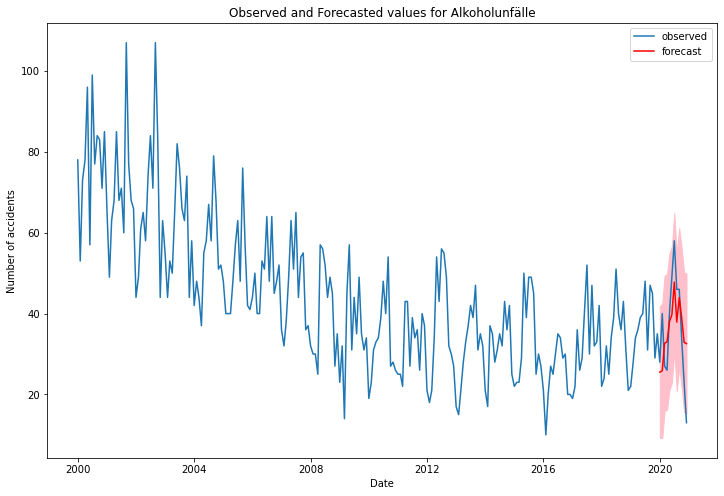

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


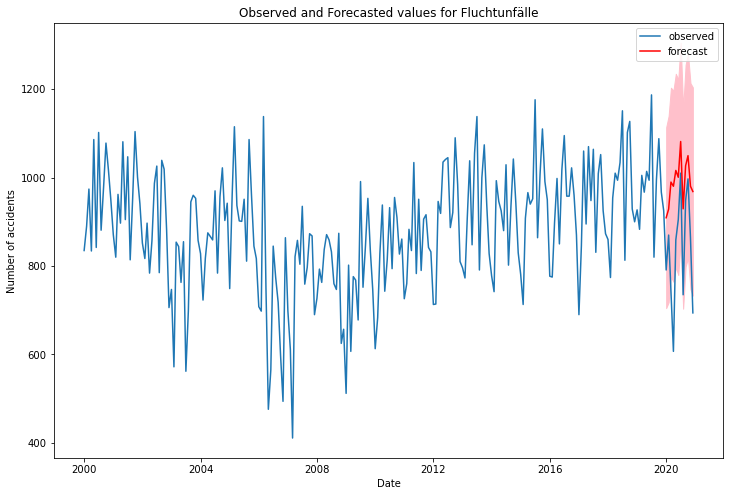

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


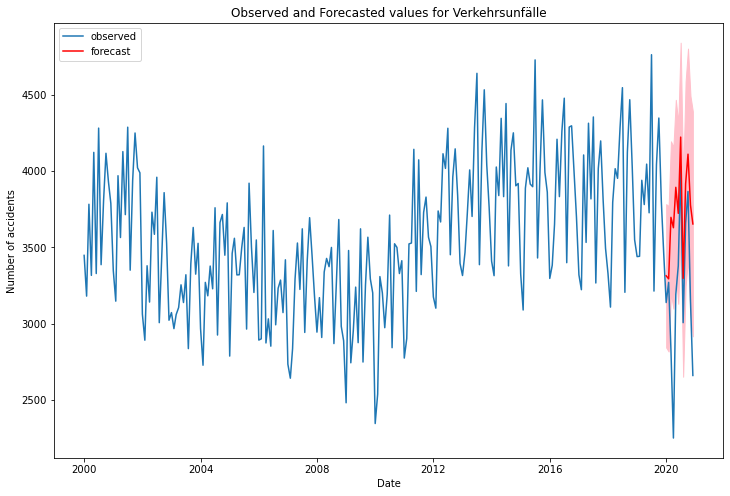

In [205]:
mse_pre
for category, dataframe in dataframes.items():
    model = SARIMAX(dataframe[:'2019'], order=orders_estimated[category][0],
                    seasonal_order=orders_estimated[category][1])
    results = model.fit()
    forecast = results.get_forecast(steps=12)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    lower_limits = confidence_intervals.iloc[:,0]
    upper_limits = confidence_intervals.iloc[:,1]
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(dataframe.index, dataframe[category], label='observed')
    ax.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
    ax.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of accidents')
    ax.set_title('Observed and Forecasted values for {}'.format(category))
    ax.legend()
    plt.show()

In [ ]:
for model